In [9]:
import cartopy.crs as ccrs
import matplotlib.path as mpath
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
import xarray as xr

# parameters for setting circular cutoff for Southern Ocean plots
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)

In [43]:
models = ['CM', 'ESM']
variables = ['hfds', 'dic_stf_gas']
fpath_in = '/xtmp/Katherine.Turner/work/storm_timeseries/'
fpath_out= '/work/Katherine.Turner/CM4_storms/data/'

mod = 'CM'
var = 'hfds'

ds = xr.open_zarr(fpath_in+f'{mod}_{var}_detrended')
ds2 = xr.open_zarr(fpath_in+f'{mod}_{var}_bandpassed_syn')
    
lat = ds2.lat.data
lon = ds2.lon.data
    
#v0 = ds[var].var(dim='time')
#v1 = ds2[var+'_bp_2d_8d'].var(dim='time')
#v0_ss = v0[:50,:]

In [44]:
# checking for whole dataset
v0_s = ds[var][:,:50,:].resample(time='QS-DEC').var(dim='time')[1:-1,:,:]
v1_s = ds2[var+'_bp_2d_8d'].resample(time='QS-DEC').var(dim='time')[1:-1,:,:]

#v0_jja = ds[var][idx_jja,:50,:].var(dim='time')
#v1_jja = ds2[var+'_bp_2d_8d'][idx_jja,:,:].var(dim='time')

In [45]:
fvar = v1_s/v0_s

idx_djf = fvar.time.dt.season=='DJF'
idx_jja = fvar.time.dt.season=='JJA'

idx_djf_hi = (fvar.time.dt.season=='DJF') & (fvar.time.dt.year.isin([175,196,202,204,228,239,244]))
idx_djf_lo = (fvar.time.dt.season=='DJF') & (fvar.time.dt.year.isin([176,192,205,212,213,224,225]))

idx_jja_hi = (fvar.time.dt.season=='JJA') & (fvar.time.dt.year.isin([159,163,190,198,219,235,242]))
idx_jja_lo = (fvar.time.dt.season=='JJA') & (fvar.time.dt.year.isin([167,197,207,220,225,228,245]))

/nbhome/Katherine.Turner/miniconda3/envs/py310/lib/python3.10/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/nbhome/Katherine.Turner/miniconda3/envs/py310/lib/python3.10/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/nbhome/Katherine.Turner/miniconda3/envs/py310/lib/python3.10/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/nbhome/Katherine.Turner/miniconda3/envs/py310/lib/python3.10/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/nbhome/Katherine.Turner/miniconda3/envs/py310/lib/python3.10/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/nbhome/Katherine.Turner/miniconda3/envs/py310/lib/python3.1

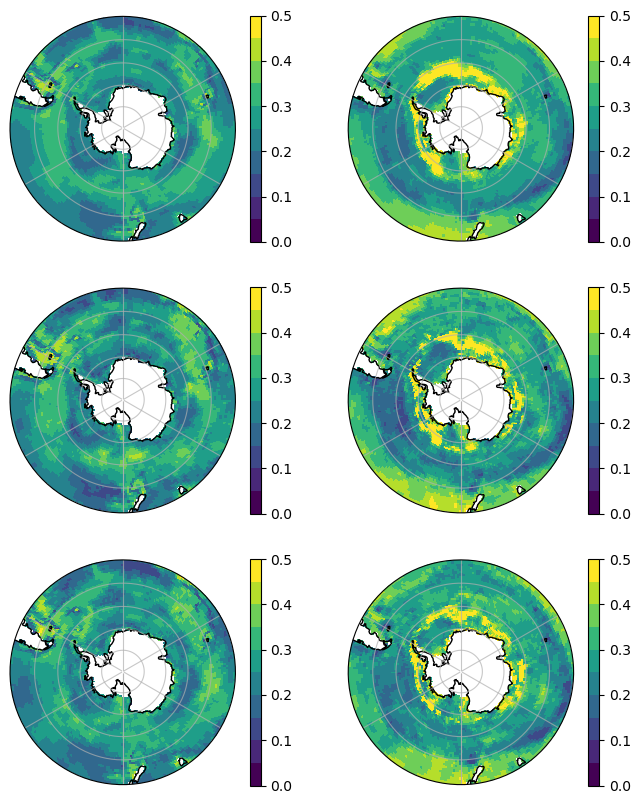

In [38]:
fig, axs = plt.subplots(nrows=3, ncols=2,
                        figsize=(8,10),
                       subplot_kw={'projection': ccrs.SouthPolarStereo()})
axs=axs.flatten()

fvar[idx_djf,:,:].mean(dim='time').plot(ax=axs[0],
                                        x='lon', y='lat', transform=ccrs.PlateCarree(),
                                        vmin=0, vmax=.5, extend='neither',
                                        cmap=plt.get_cmap('viridis', 10)
                                       )

fvar[idx_jja,:,:].mean(dim='time').plot(ax=axs[1],
                                        x='lon', y='lat', transform=ccrs.PlateCarree(),
                                        vmin=0, vmax=0.5, extend='neither',
                                        cmap=plt.get_cmap('viridis', 10)
                                       )

fvar[idx_djf_hi,:,:].mean(dim='time').plot(ax=axs[2],
                                        x='lon', y='lat', transform=ccrs.PlateCarree(),
                                        vmin=0, vmax=.5, extend='neither',
                                        cmap=plt.get_cmap('viridis', 10)
                                       )

fvar[idx_jja_hi,:,:].mean(dim='time').plot(ax=axs[3],
                                        x='lon', y='lat', transform=ccrs.PlateCarree(),
                                        vmin=0, vmax=0.5, extend='neither',
                                        cmap=plt.get_cmap('viridis', 10)
                                       )

fvar[idx_djf_lo,:,:].mean(dim='time').plot(ax=axs[4],
                                        x='lon', y='lat', transform=ccrs.PlateCarree(),
                                        vmin=0, vmax=.5, extend='neither',
                                        cmap=plt.get_cmap('viridis', 10)
                                       )

fvar[idx_jja_lo,:,:].mean(dim='time').plot(ax=axs[5],
                                        x='lon', y='lat', transform=ccrs.PlateCarree(),
                                        vmin=0, vmax=0.5, extend='neither',
                                        cmap=plt.get_cmap('viridis', 10)
                                       )


for i in range(6):
    axs[i].set_extent([-180, 180, -90, -40], ccrs.PlateCarree())
    axs[i].gridlines(alpha=0.7)
    axs[i].set_boundary(circle, transform=axs[i].transAxes)
    axs[i].coastlines()

/nbhome/Katherine.Turner/miniconda3/envs/py310/lib/python3.10/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/nbhome/Katherine.Turner/miniconda3/envs/py310/lib/python3.10/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/nbhome/Katherine.Turner/miniconda3/envs/py310/lib/python3.10/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/nbhome/Katherine.Turner/miniconda3/envs/py310/lib/python3.10/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/nbhome/Katherine.Turner/miniconda3/envs/py310/lib/python3.10/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in divide
  x = np.divide(x1, x2, out)
/nbhome/Katherine.Turner/miniconda3/envs/py310/lib/python3.1

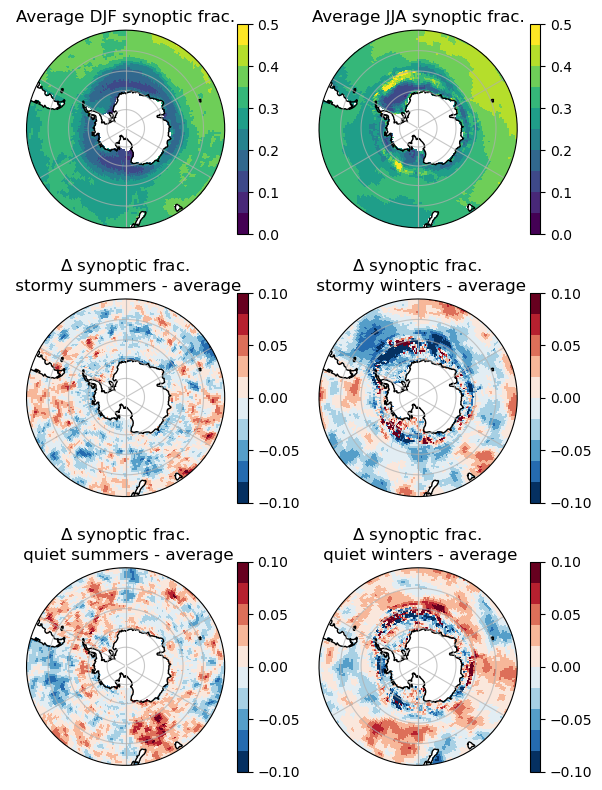

In [47]:
fig, axs = plt.subplots(nrows=3, ncols=2,
                        figsize=(6,8),
                       subplot_kw={'projection': ccrs.SouthPolarStereo()})
axs=axs.flatten()

fvar[idx_djf,:,:].mean(dim='time').plot(ax=axs[0],
                                        x='lon', y='lat', transform=ccrs.PlateCarree(),
                                        vmin=0, vmax=.5, extend='neither',
                                        cmap=plt.get_cmap('viridis', 10)
                                       )
axs[0].set_title('Average DJF synoptic frac.')

fvar[idx_jja,:,:].mean(dim='time').plot(ax=axs[1],
                                        x='lon', y='lat', transform=ccrs.PlateCarree(),
                                        vmin=0, vmax=0.5, extend='neither',
                                        cmap=plt.get_cmap('viridis', 10)
                                       )
axs[1].set_title('Average JJA synoptic frac.')

(fvar[idx_djf_hi,:,:].mean(dim='time') - fvar[idx_djf,:,:].mean(dim='time')).plot(ax=axs[2],
                                        x='lon', y='lat', transform=ccrs.PlateCarree(),
                                        vmin=-.1, vmax=.1, extend='neither',
                                        cmap=plt.get_cmap('RdBu_r', 10)
                                       )

axs[2].set_title('$\Delta$ synoptic frac. \n stormy summers - average')

(fvar[idx_jja_hi,:,:].mean(dim='time') - fvar[idx_jja,:,:].mean(dim='time')).plot(ax=axs[3],
                                        x='lon', y='lat', transform=ccrs.PlateCarree(),
                                        vmin=-.1, vmax=.1, extend='neither',
                                        cmap=plt.get_cmap('RdBu_r', 10)
                                       )
axs[3].set_title('$\Delta$ synoptic frac. \n stormy winters - average')

(fvar[idx_djf_lo,:,:].mean(dim='time') - fvar[idx_djf,:,:].mean(dim='time')).plot(ax=axs[4],
                                        x='lon', y='lat', transform=ccrs.PlateCarree(),
                                        vmin=-.1, vmax=.1, extend='neither',
                                        cmap=plt.get_cmap('RdBu_r', 10)
                                       )
axs[4].set_title('$\Delta$ synoptic frac. \n quiet summers - average')

(fvar[idx_jja_lo,:,:].mean(dim='time') - fvar[idx_jja,:,:].mean(dim='time')).plot(ax=axs[5],
                                        x='lon', y='lat', transform=ccrs.PlateCarree(),
                                        vmin=-.1, vmax=.1, extend='neither',
                                        cmap=plt.get_cmap('RdBu_r', 10)
                                       )
axs[5].set_title('$\Delta$ synoptic frac. \n quiet winters - average')


for i in range(6):
    axs[i].set_extent([-180, 180, -90, -40], ccrs.PlateCarree())
    axs[i].gridlines(alpha=0.7)
    axs[i].set_boundary(circle, transform=axs[i].transAxes)
    axs[i].coastlines()
    
plt.tight_layout()
    
plt.savefig('/work/Katherine.Turner/smaller_projects/hifreq-variability/figures/synfrac_delta_hfds_CM4.png', format='png', dpi=100)